# Hackathon December 2023

# NYC Parking Tickets


- **Dataset description**
    
    The NYC Department of Finance collects data on every parking ticket issued in NYC (~10M per year!). This data is made publicly available to aid in ticket resolution and to guide policymakers.
    
    There are four files, covering Aug 2013-June 2017. The files are roughly organized by fiscal year (July 1 - June 30) with the exception of the initial dataset. The initial dataset also lacks 8 columns that are included in the other three datasets (although be warned that these additional data columns are used sparingly). See the dataset descriptions for exact details. Columns include information about the vehicle ticketed, the ticket issued, location, and time.

- **Business task intro**
    
    You have been requested to provide a report for a private parking providing company about their possible growth in NYC. Analyze the provided dataset and make conclusions regarding the most popular parking areas and vehicle types, tickets info and seasonality.

## Step 1. Download the data and prepare it for analysis



In [1]:
%pip install usaddress

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install sidetable

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import sidetable
import warnings
import usaddress
import plotly.graph_objects as go
import plotly.express as px
from matplotlib import pyplot as plt
plt.style.use('seaborn-pastel')
import seaborn as sns
sns.set_palette('pastel') 

/var/folders/fw/h9yr354n7s7dgzvnd7wxs6w00000gp/T/ipykernel_68141/129277660.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


**Our datasets are too heavy and difficult to download. We need to use low_memory=False parameter - still very slow - or try to optimize reading changing datatypes where possible: object > category and parse dates. This definitely reduces df size. I tried both variants, here is the second:**

In [4]:

# Specify the column names  to be converted to 'category' dtype
category_columns = ['Registration State', 'Plate Type', 'Vehicle Body Type', 'Issuing Agency',
                     'Violation County', 'Violation In Front Of Or Opposite', 'Vehicle Color',
                    'Issuer Squad', 'Violation Post Code','Issuer Command','Violation Legal Code','Sub Division']
# Specify the data types for the specified columns
dtype_specification = {col: 'category' for col in category_columns}

# Specify the columns to parse as dates
date_columns = ['Issue Date']


In [5]:
d_14 = pd.read_csv('/Users/Nina/Downloads/Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv',
                   dtype=dtype_specification,
                   parse_dates=date_columns)


/var/folders/fw/h9yr354n7s7dgzvnd7wxs6w00000gp/T/ipykernel_68141/3446821395.py:1: DtypeWarning: Columns (20,23,30,31,32,36,39) have mixed types. Specify dtype option on import or set low_memory=False.
  d_14 = pd.read_csv('/Users/Nina/Downloads/Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv',


In [6]:
d_15 = pd.read_csv('/Users/Nina/Downloads/Parking_Violations_Issued_-_Fiscal_Year_2015.csv',dtype=dtype_specification,
                   parse_dates=date_columns)
   

/var/folders/fw/h9yr354n7s7dgzvnd7wxs6w00000gp/T/ipykernel_68141/3333714320.py:1: DtypeWarning: Columns (40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  d_15 = pd.read_csv('/Users/Nina/Downloads/Parking_Violations_Issued_-_Fiscal_Year_2015.csv',dtype=dtype_specification,


In [7]:
d_16 = pd.read_csv('/Users/Nina/Downloads/Parking_Violations_Issued_-_Fiscal_Year_2016.csv',dtype=dtype_specification,
                   parse_dates=date_columns)


/var/folders/fw/h9yr354n7s7dgzvnd7wxs6w00000gp/T/ipykernel_68141/812612005.py:1: DtypeWarning: Columns (20,23,30,31,32,34,36,39) have mixed types. Specify dtype option on import or set low_memory=False.
  d_16 = pd.read_csv('/Users/Nina/Downloads/Parking_Violations_Issued_-_Fiscal_Year_2016.csv',dtype=dtype_specification,


In [8]:
d_17 = pd.read_csv('/Users/Nina/Downloads/Parking_Violations_Issued_-_Fiscal_Year_2017.csv',dtype=dtype_specification,
                   parse_dates=date_columns)


We have warnings, but it works, now we can start preprocessing! Each df lost 0.6-0.7GB, but there's still the room for improvement - look at other columns... or some other method or just low_memory parameter... **Your ideas**?

**Let's look at our datasets and check missing values and duplicates**

### d_14

In [9]:
d_14.head(2)

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Hydrant Violation,Double Parking Violation,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
0,1283294138,GBB9093,NY,PAS,2013-08-04,46,SUBN,AUDI,P,37250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1283294151,62416MB,NY,COM,2013-08-04,46,VAN,FORD,P,37290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
d_14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9100278 entries, 0 to 9100277
Data columns (total 51 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   Summons Number                     int64         
 1   Plate ID                           object        
 2   Registration State                 category      
 3   Plate Type                         category      
 4   Issue Date                         datetime64[ns]
 5   Violation Code                     int64         
 6   Vehicle Body Type                  category      
 7   Vehicle Make                       object        
 8   Issuing Agency                     category      
 9   Street Code1                       int64         
 10  Street Code2                       int64         
 11  Street Code3                       int64         
 12  Vehicle Expiration Date            int64         
 13  Violation Location                 float64       
 14  Vi

In [11]:
d_14.duplicated().sum()

0

In [12]:
#check missing values in data
d_14_mis=d_14.stb.missing(style=True).data.reset_index()
d_14_mis

,index,missing,total,percent
0,NTA,9100278,9100278,100.000000
1,BBL,9100278,9100278,100.000000
2,BIN,9100278,9100278,100.000000
3,Census Tract,9100278,9100278,100.000000
4,Community Council,9100278,9100278,100.000000
5,Community Board,9100278,9100278,100.000000
6,Longitude,9100278,9100278,100.000000
7,Latitude,9100278,9100278,100.000000
8,Double Parking Violation,9100278,9100278,100.000000
9,Hydrant Violation,9100278,9100278,100.000000


11 columns are totally empty, 5 columns have 77-92% of missing values. 

13 columns don't have mv, 10 col have < 1% of mv, 7 col have 1-10% mv, 5 col - 13-17% of mv

### d_15

In [13]:
d_15.head(2)

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Hydrant Violation,Double Parking Violation,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
0,8002531292,EPC5238,NY,PAS,2014-10-01,21,SUBN,CHEVR,T,20390,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8015318440,5298MD,NY,COM,2015-03-06,14,VAN,FRUEH,T,27790,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
d_15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11809233 entries, 0 to 11809232
Data columns (total 51 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   Summons Number                     int64         
 1   Plate ID                           object        
 2   Registration State                 category      
 3   Plate Type                         category      
 4   Issue Date                         datetime64[ns]
 5   Violation Code                     int64         
 6   Vehicle Body Type                  category      
 7   Vehicle Make                       object        
 8   Issuing Agency                     category      
 9   Street Code1                       int64         
 10  Street Code2                       int64         
 11  Street Code3                       int64         
 12  Vehicle Expiration Date            object        
 13  Violation Location                 float64       
 14  

In [15]:
#check duplicates
d_15.duplicated().sum()

857976

In [16]:
#share of duplicated rows in the df
d_15.duplicated().sum()/len(d_15)

0.07265298262808431

About 7% of duplicates. Let's drop them.

In [17]:
#dropping duplicates
d_15.drop_duplicates(inplace=True)

In [18]:
d_15.shape

(10951257, 51)

**857976 duplicated rows are dropped. Your ideas?**.

In [19]:
d_15_mis= d_15.stb.missing(style=True).data.reset_index()
d_15_mis

,index,missing,total,percent
0,NTA,10951257,10951257,100.000000
1,BBL,10951257,10951257,100.000000
2,BIN,10951257,10951257,100.000000
3,Census Tract,10951257,10951257,100.000000
4,Community Council,10951257,10951257,100.000000
5,Community Board,10951257,10951257,100.000000
6,Longitude,10951257,10951257,100.000000
7,Latitude,10951257,10951257,100.000000
8,Double Parking Violation,10951256,10951257,99.999991
9,Hydrant Violation,10951256,10951257,99.999991


11 columns are empty(100 - 99.9% mv), 5 col with > 72% mv
24 col have 0-1% mv, 9 col - 11-26% mv, 2 col 43% mv


### d_16

In [20]:
d_16.head(2)

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Hydrant Violation,Double Parking Violation,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
0,1363745270,GGY6450,99,PAS,2015-07-09,46,SDN,HONDA,P,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1363745293,KXD355,SC,PAS,2015-07-09,21,SUBN,CHEVR,P,55730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
d_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10626899 entries, 0 to 10626898
Data columns (total 51 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   Summons Number                     int64         
 1   Plate ID                           object        
 2   Registration State                 category      
 3   Plate Type                         category      
 4   Issue Date                         datetime64[ns]
 5   Violation Code                     int64         
 6   Vehicle Body Type                  category      
 7   Vehicle Make                       object        
 8   Issuing Agency                     category      
 9   Street Code1                       int64         
 10  Street Code2                       int64         
 11  Street Code3                       int64         
 12  Vehicle Expiration Date            float64       
 13  Violation Location                 float64       
 14  

In [22]:
d_16.duplicated().sum()

0

In [23]:
d_16_mis = d_16.stb.missing(style=True).data.reset_index()
d_16_mis

,index,missing,total,percent
0,NTA,10626899,10626899,100.000000
1,BBL,10626899,10626899,100.000000
2,BIN,10626899,10626899,100.000000
3,Census Tract,10626899,10626899,100.000000
4,Community Council,10626899,10626899,100.000000
5,Community Board,10626899,10626899,100.000000
6,Longitude,10626899,10626899,100.000000
7,Latitude,10626899,10626899,100.000000
8,Double Parking Violation,10626899,10626899,100.000000
9,Hydrant Violation,10626899,10626899,100.000000


Again, lots of missing values, no duplicates.

### d_17

In [24]:
d_17.head(2)

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,5092469481,GZH7067,NY,PAS,2016-07-10,7,SUBN,TOYOT,V,0,...,GY,NaN,2001,NaN,0,NaN,FAILURE TO STOP AT RED LIGHT,NaN,NaN,NaN
1,5092451658,GZH7067,NY,PAS,2016-07-08,7,SUBN,TOYOT,V,0,...,GY,NaN,2001,NaN,0,NaN,FAILURE TO STOP AT RED LIGHT,NaN,NaN,NaN


In [25]:
d_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10803028 entries, 0 to 10803027
Data columns (total 43 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   Summons Number                     int64         
 1   Plate ID                           object        
 2   Registration State                 category      
 3   Plate Type                         category      
 4   Issue Date                         datetime64[ns]
 5   Violation Code                     int64         
 6   Vehicle Body Type                  category      
 7   Vehicle Make                       object        
 8   Issuing Agency                     category      
 9   Street Code1                       int64         
 10  Street Code2                       int64         
 11  Street Code3                       int64         
 12  Vehicle Expiration Date            int64         
 13  Violation Location                 float64       
 14  

In [26]:
d_17_mis=d_17.stb.missing(style=True).data.reset_index()
d_17_mis


,index,missing,total,percent
0,Double Parking Violation,10803028,10803028,100.000000
1,No Standing or Stopping Violation,10803028,10803028,100.000000
2,Hydrant Violation,10803028,10803028,100.000000
3,Time First Observed,9962281,10803028,92.217488
4,Unregistered Vehicle?,9675432,10803028,89.562223
5,Meter Number,9017555,10803028,83.472476
6,Violation Legal Code,8740321,10803028,80.906214
7,Intersecting Street,7435473,10803028,68.827675
8,From Hours In Effect,5450946,10803028,50.457575
9,To Hours In Effect,5450943,10803028,50.457548


Again, lots of missing values, no duplicates.

## Addressing missing values.
I merged 4 tables with missing values in one to see the whole picture.

In [27]:
merged_table = d_14_mis.merge(d_15_mis, on='index', how='outer', suffixes=('_d_14', '_d_15'))
merged_table = merged_table.merge(d_16_mis, on='index', how='outer', suffixes=('_d_15', '_d_16'))
merged_table = merged_table.merge(d_17_mis, on='index', how='outer', suffixes=('_d_16', '_d_17'))
merged_table

,index,missing_d_14,total_d_14,percent_d_14,missing_d_15,total_d_15,percent_d_15,missing_d_16,total_d_16,percent_d_16,missing_d_17,total_d_17,percent_d_17
0,NTA,9100278,9100278,100.000000,10951257,10951257,100.000000,10626899,10626899,100.000000,NaN,NaN,NaN
1,BBL,9100278,9100278,100.000000,10951257,10951257,100.000000,10626899,10626899,100.000000,NaN,NaN,NaN
2,BIN,9100278,9100278,100.000000,10951257,10951257,100.000000,10626899,10626899,100.000000,NaN,NaN,NaN
3,Census Tract,9100278,9100278,100.000000,10951257,10951257,100.000000,10626899,10626899,100.000000,NaN,NaN,NaN
4,Community Council,9100278,9100278,100.000000,10951257,10951257,100.000000,10626899,10626899,100.000000,NaN,NaN,NaN
5,Community Board,9100278,9100278,100.000000,10951257,10951257,100.000000,10626899,10626899,100.000000,NaN,NaN,NaN
6,Longitude,9100278,9100278,100.000000,10951257,10951257,100.000000,10626899,10626899,100.000000,NaN,NaN,NaN
7,Latitude,9100278,9100278,100.000000,10951257,10951257,100.000000,10626899,10626899,100.000000,NaN,NaN,NaN
8,Double Parking Violation,9100278,9100278,100.000000,10951256,10951257,99.999991,10626899,10626899,100.000000,10803028.0,10803028.0,100.000000
9,Hydrant Violation,9100278,9100278,100.000000,10951256,10951257,99.999991,10626899,10626899,100.000000,10803028.0,10803028.0,100.000000


The first 11 columns have 100% missing values - empty, 8 of them are absent in d_17. Many columns have >70% of mis.values.

Let's drop empty columns and columns where almost all values are missing. What threshold?

In [28]:
# set threshold 
threshold_percentage = 68  

In [29]:
# calculate % of missing values in each column
missing_percentage = (d_14.isnull().mean() * 100)

# Drop columns where the percentage of missing values is below the threshold
columns_to_drop = missing_percentage[missing_percentage > threshold_percentage].index
df_14 = d_14.drop(columns=columns_to_drop)
df_14.shape

(9100278, 35)

In [30]:
#% of missing values in d_15 columns
missing_percentage = (d_15.isnull().mean() * 100)

# Drop columns where the percentage of missing values is below the threshold
columns_to_drop = missing_percentage[missing_percentage > threshold_percentage].index
df_15 = d_15.drop(columns=columns_to_drop)
df_15.shape

(10951257, 35)

In [31]:
#% of missing values in d_16 columns
missing_percentage = (d_16.isnull().mean() * 100)

# Drop columns where the percentage of missing values is below the threshold
columns_to_drop = missing_percentage[missing_percentage > threshold_percentage].index
df_16 = d_16.drop(columns=columns_to_drop)
df_16.shape


(10626899, 35)

In [32]:
#% of missing values in d_17 columns
missing_percentage = (d_17.isnull().mean() * 100)

# Drop columns where the percentage of missing values is below the threshold
columns_to_drop = missing_percentage[missing_percentage > threshold_percentage].index
df_17 = d_17.drop(columns=columns_to_drop)
df_17.shape


(10803028, 35)

**So, 16 columns with more than 68% of ms were dropped. Now all tables have only 35 columns and are not so heavy as before.**

## Choosing relevant columns


 Let's adjust column names in all dfs.

In [33]:
df_14.columns = df_17.columns.str.lower().str.rstrip().str.replace(' ', '_')
df_15.columns = df_17.columns.str.lower().str.rstrip().str.replace(' ', '_')
df_16.columns = df_17.columns.str.lower().str.rstrip().str.replace(' ', '_')
df_17.columns = df_17.columns.str.lower().str.rstrip().str.replace(' ', '_')

Let's consider the columns and choose only those that are necessary for our task. All 4 tables have the same columns, so we take df_17 as an example.

In [34]:
#edit column names
df_17.columns = df_17.columns.str.lower().str.rstrip().str.replace(' ', '_')
df_17.columns

Index(['summons_number', 'plate_id', 'registration_state', 'plate_type',
       'issue_date', 'violation_code', 'vehicle_body_type', 'vehicle_make',
       'issuing_agency', 'street_code1', 'street_code2', 'street_code3',
       'vehicle_expiration_date', 'violation_location', 'violation_precinct',
       'issuer_precinct', 'issuer_code', 'issuer_command', 'issuer_squad',
       'violation_time', 'violation_county',
       'violation_in_front_of_or_opposite', 'house_number', 'street_name',
       'date_first_observed', 'law_section', 'sub_division',
       'days_parking_in_effect', 'from_hours_in_effect', 'to_hours_in_effect',
       'vehicle_color', 'vehicle_year', 'feet_from_curb',
       'violation_post_code', 'violation_description'],
      dtype='object')

In [35]:
df_17_mis=df_17.stb.missing(style=True).data.reset_index()
df_17_mis[['index', 'percent']]

,index,percent
0,from_hours_in_effect,50.457575
1,to_hours_in_effect,50.457548
2,violation_post_code,29.530489
3,days_parking_in_effect,25.107923
4,house_number,21.184968
5,violation_in_front_of_or_opposite,20.005826
6,violation_location,19.183510
7,issuer_squad,19.101506
8,issuer_command,19.093212
9,violation_description,10.436611


In [36]:
df_17.columns

Index(['summons_number', 'plate_id', 'registration_state', 'plate_type',
       'issue_date', 'violation_code', 'vehicle_body_type', 'vehicle_make',
       'issuing_agency', 'street_code1', 'street_code2', 'street_code3',
       'vehicle_expiration_date', 'violation_location', 'violation_precinct',
       'issuer_precinct', 'issuer_code', 'issuer_command', 'issuer_squad',
       'violation_time', 'violation_county',
       'violation_in_front_of_or_opposite', 'house_number', 'street_name',
       'date_first_observed', 'law_section', 'sub_division',
       'days_parking_in_effect', 'from_hours_in_effect', 'to_hours_in_effect',
       'vehicle_color', 'vehicle_year', 'feet_from_curb',
       'violation_post_code', 'violation_description'],
      dtype='object')

Max offered to take just 11 columns yesterday:

0   Plate ID               42330603 non-null  object
 1   Plate Type             42339438 non-null  object
 2   Issue Date             42339438 non-null  object
 3   Violation Code         42339438 non-null  category
 4   Vehicle Body Type      42100253 non-null  object
 5   Street Code1           42339438 non-null  int32
 6   Street Code2           42339438 non-null  int32
 7   Street Code3           42339438 non-null  int32
 8   Violation Precinct     42339437 non-null  float64 
 9   Violation Time         42331306 non-null  object
 10  Violation Description  37460623 non-null  object

Sergey's list of 16 columns:
Plate ID
Registration State
Plate Type
Issue Date
Violation Code
Vehicle Body Type
Street Code1
Street Code2
Street Code3
Violation Precinct
Violation Time
Violation County
House Number
Street Name
Violation Description

In [65]:
# make a function
def analyze_column_values(dataframe, columns):
    for column in columns:
        # Use value_counts to get the distribution of unique values
        value_counts = dataframe[column].value_counts()

        print(f"Column: {column}")
        print(value_counts)
        print("\n" + "="*40 + "\n")


Let's group columns describing a violation, vehicle, issue and others.

### columns describing violation

In [66]:
columns_violation = ['summons_number','violation_code','violation_description','violation_post_code','violation_location', 'violation_precinct', 'violation_county',
       'violation_in_front_of_or_opposite', 'violation_time',]

analyze_column_values(df_17, columns_violation)

Column: summons_number
summons_number
5092469481    1
1402657948    1
4631696898    1
4624040351    1
8150070667    1
             ..
8381009492    1
8536950900    1
8012387475    1
1414557644    1
1415995370    1
Name: count, Length: 10803028, dtype: int64


Column: violation_code
violation_code
21    1528588
36    1400614
38    1062304
14     893498
20     618593
       ...   
54         11
28          9
44          8
57          5
87          1
Name: count, Length: 100, dtype: int64


Column: violation_description
violation_description
PHTO SCHOOL ZN SPEED VIOLATION    1400614
21-No Parking (street clean)      1230545
38-Failure to Display Muni Rec    1056018
14-No Standing                     811080
37-Expired Muni Meter              593902
                                   ...   
44-Exc Limit (Com. Mtr. Zone)           4
93-Repair Flat Tire (Maj Road)          4
28-O/T STD,DPL/Con,30 Mn,D Dec          3
63-Nighttime STD/PKG in a Park          2
65-O/T STD,Dpl/Con,30 Mn,D/S       

**Important**: 'violation_code','violation_description', 'violation_precinct', 'violation_county','violation_time'

**Not important**: 'violation_post_code',  'violation_location', 'violation_in_front_of_or_opposite'

**Vote**:'summons_number' - it's an id, we need it? 

### columns describing vehicle

In [67]:
columns_vehicle = [ 'plate_id', 'plate_type','registration_state', 'vehicle_body_type', 'vehicle_make','vehicle_expiration_date', 
                   'vehicle_color', 'vehicle_year', 'date_first_observed'] 
# Call the function to analyze column values
analyze_column_values(df_17, columns_vehicle)

Column: plate_id
plate_id
BLANKPLATE    11758
96087MA        1046
85848MD        1045
12359MG         991
30954JX         974
              ...  
64SL86            1
GDG9572           1
GFN5627           1
42554C            1
GAW6650           1
Name: count, Length: 3059045, dtype: int64


Column: plate_type
plate_type
PAS    7993499
COM    1839534
OMT     450185
OMS     108568
SRF      88713
        ...   
JCL          2
LOC          1
HOU          1
JCA          1
JWV          1
Name: count, Length: 86, dtype: int64


Column: registration_state
registration_state
NY    8481061
NJ     925965
PA     285419
FL     144556
CT     141088
       ...   
MB         40
SK         30
FO         12
NT          4
MX          4
Name: count, Length: 67, dtype: int64


Column: vehicle_body_type
vehicle_body_type
SUBN    3719802
4DSD    3082020
VAN     1411970
DELV     687330
SDN      438191
         ...   
SOUT          1
TRIM          1
OLB           1
CROV          1
ZSS           1
Name: count, L


**Important**: 'plate_id','vehicle_body_type', 'registration_state',

**Not important**: 'vehicle_expiration_date', 'vehicle_color', 'vehicle_year', 'date_first_observed'

**Vote**: 'plate_type','vehicle_make'? 

### columns describing issue, issuer

In [68]:
columns_issue = ['issue_date', 'issuing_agency','issuer_precinct', 'issuer_code','issuer_command', 'issuer_squad']
analyze_column_values(df_17, columns_issue)

Column: issue_date
issue_date
2016-09-16    46860
2016-09-27    46271
2016-10-07    45892
2016-10-06    45870
2016-10-11    45820
              ...  
2000-12-20        1
2000-12-19        1
2000-12-16        1
2000-12-14        1
2069-11-19        1
Name: count, Length: 2063, dtype: int64


Column: issuing_agency
issuing_agency
T    7613149
V    2062644
P     798244
S     297754
X      20470
K       8025
C        830
F        548
R        533
E        352
H        257
D        134
M         54
B         27
G          4
O          2
N          1
Name: count, dtype: int64


Column: issuer_precinct
issuer_precinct
0      2388479
19      521513
14      344977
1       321170
18      296553
        ...   
613          1
315          1
415          1
134          1
811          1
Name: count, Length: 655, dtype: int64


Column: issuer_code
issuer_code
0         2071270
355542      19346
351966      18046
354144      15669
346199      15383
           ...   
933187          1
72877           1

**Important**: 'issue_date', 

**Not important**: 'issuing_agency', 'issuer_code','issuer_command', 'issuer_squad'

**Vote**: I'd probably take issuer_precinct to compare it with violation_precinct? Or we don't have time for that


### remaining columns

In [69]:
columns_remaining = ['street_code1', 'street_code2', 'street_code3','house_number', 'street_name','law_section', 'sub_division',
       'days_parking_in_effect', 'from_hours_in_effect', 'to_hours_in_effect','feet_from_curb']
analyze_column_values(df_17, columns_remaining)

Column: street_code1
street_code1
0        2642658
13610     163811
10210     152138
25390     105016
24890      86539
          ...   
87830          1
70082          1
24025          1
42670          1
47564          1
Name: count, Length: 6561, dtype: int64


Column: street_code2
street_code2
0        3413924
40404     288257
10410     202097
13610     103880
10210      97688
          ...   
61147          1
30950          1
27357          1
48795          1
15405          1
Name: count, Length: 6855, dtype: int64


Column: street_code3
street_code3
0        3523086
40404     288257
10510     111969
13610     109343
10810      97359
          ...   
42370          1
43179          1
39920          1
30100          1
38480          1
Name: count, Length: 6730, dtype: int64


Column: house_number
house_number
N          344089
S          300201
E          274723
W          264172
200         23005
            ...  
139-94          1
4001-99         1
153-5           1
208-219        

Most of these columns actually refer to violation place
**important**: 'street_code1', 'street_code2', 'street_code3','house_number', 'street_name'

**not important**: 'days_parking_in_effect', 'from_hours_in_effect', 'to_hours_in_effect','feet_from_curb'

**vote**: 'law_section', 'sub_division'? if we suppose to analize violations over time including day of the week, maybe days_parking_in_effect is also important. But it has 25% of mv, so let's better not take it.

### summing up

We need to choose columns for the final list

In [71]:
our_columns=  ['plate_id','plate_type', 'registration_state', 'vehicle_body_type', 'violation_code','violation_description', 'violation_precinct', 'violation_county','violation_time', 'issue_date','house_number', 'street_name', 'law_section']


In [72]:
our_17 = df_17[our_columns]

In [73]:
our_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10803028 entries, 0 to 10803027
Data columns (total 13 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   plate_id               object        
 1   plate_type             category      
 2   registration_state     category      
 3   vehicle_body_type      category      
 4   violation_code         int64         
 5   violation_description  object        
 6   violation_precinct     int64         
 7   violation_county       category      
 8   violation_time         object        
 9   issue_date             datetime64[ns]
 10  house_number           object        
 11  street_name            object        
 12  law_section            int64         
dtypes: category(4), datetime64[ns](1), int64(3), object(5)
memory usage: 793.4+ MB


In [74]:
our_16 = df_16[our_columns]
our_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10626899 entries, 0 to 10626898
Data columns (total 13 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   plate_id               object        
 1   plate_type             category      
 2   registration_state     category      
 3   vehicle_body_type      category      
 4   violation_code         int64         
 5   violation_description  object        
 6   violation_precinct     float64       
 7   violation_county       category      
 8   violation_time         object        
 9   issue_date             datetime64[ns]
 10  house_number           object        
 11  street_name            object        
 12  law_section            float64       
dtypes: category(4), datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 780.4+ MB


In [75]:
our_15 = df_15[our_columns]
our_15.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10951257 entries, 0 to 11809232
Data columns (total 13 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   plate_id               object        
 1   plate_type             category      
 2   registration_state     category      
 3   vehicle_body_type      category      
 4   violation_code         int64         
 5   violation_description  object        
 6   violation_precinct     int64         
 7   violation_county       category      
 8   violation_time         object        
 9   issue_date             datetime64[ns]
 10  house_number           object        
 11  street_name            object        
 12  law_section            float64       
dtypes: category(4), datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 887.8+ MB


In [76]:
our_14 = df_14[our_columns]
our_14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9100278 entries, 0 to 9100277
Data columns (total 13 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   plate_id               object        
 1   plate_type             category      
 2   registration_state     category      
 3   vehicle_body_type      category      
 4   violation_code         int64         
 5   violation_description  object        
 6   violation_precinct     int64         
 7   violation_county       category      
 8   violation_time         object        
 9   issue_date             datetime64[ns]
 10  house_number           object        
 11  street_name            object        
 12  law_section            float64       
dtypes: category(4), datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 668.3+ MB


## Filtering dates

Let's look at issue_date column values in all df

### our_14.issue_date

In [81]:
our_14.issue_date.describe()

count                          9100278
mean     2014-01-09 00:10:36.416248832
min                1970-12-18 00:00:00
25%                2013-10-15 00:00:00
50%                2014-01-09 00:00:00
75%                2014-04-05 00:00:00
max                2069-12-23 00:00:00
Name: issue_date, dtype: object

Look at min and max values. The table is supposed to store data for 2014 fiscal year (July 1 - June 30), but there are lots of weird values for past and future dates(1970,2069). Let's plot a histogram.

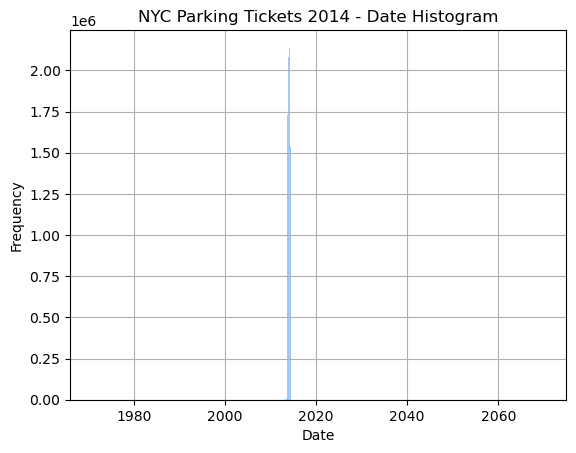

In [82]:
our_14.hist('issue_date', bins = 500)
plt.title('NYC Parking Tickets 2014 - Date Histogram')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

The majority of values are around 2014, there are also outliers/errors below and above. Let's zoom the picture and specify the range from 1 month before the 2014 fiscal year started and 1 month after it ended.

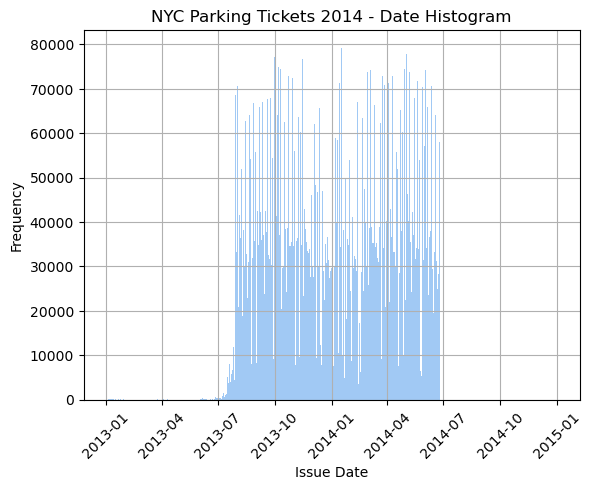

In [83]:
our_14.hist('issue_date', bins = 500, range = ('2013-01-01', '2015-01-01'))
plt.title('NYC Parking Tickets 2014 - Date Histogram')
plt.xlabel('Issue Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

The upper border is sharp - almost no data after 2014-07-01 and even several days earlier are missing(included in our_15?), the left border is more smooth, July is incomplete.

### our_15.issue_date

In [84]:
our_15.issue_date.describe()

count                         10951257
mean     2014-12-25 08:23:35.298353152
min                1985-07-16 00:00:00
25%                2014-09-17 00:00:00
50%                2014-12-24 00:00:00
75%                2015-04-07 00:00:00
max                2015-06-30 00:00:00
Name: issue_date, dtype: object

Let's take for plotting only dates from 4 months before 2015 fiscal began till a month after it ended.

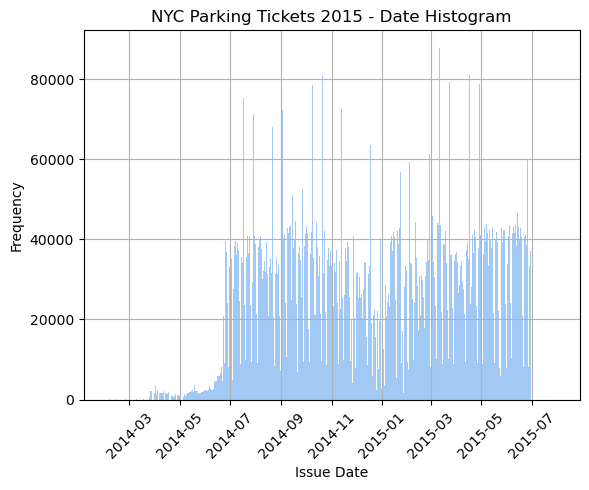

In [85]:
our_15.hist('issue_date', bins = 500, range = ('2014-02-01', '2015-08-01'))
plt.title('NYC Parking Tickets 2015 - Date Histogram')
plt.xlabel('Issue Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

The upper border is sharp and clear just at the end of 2015 fiscal year, while at the left end there is a tail from the previous fiscal year(for some reason these data  got here) - important facts for future uniting dfs. More than 2 months of data are overlapping!

### our_16.issue_date

In [86]:
our_16.issue_date.describe()

count                         10626899
mean     2015-12-17 18:26:35.709831680
min                1970-04-13 00:00:00
25%                2015-09-21 00:00:00
50%                2015-12-12 00:00:00
75%                2016-03-17 00:00:00
max                2069-10-02 00:00:00
Name: issue_date, dtype: object

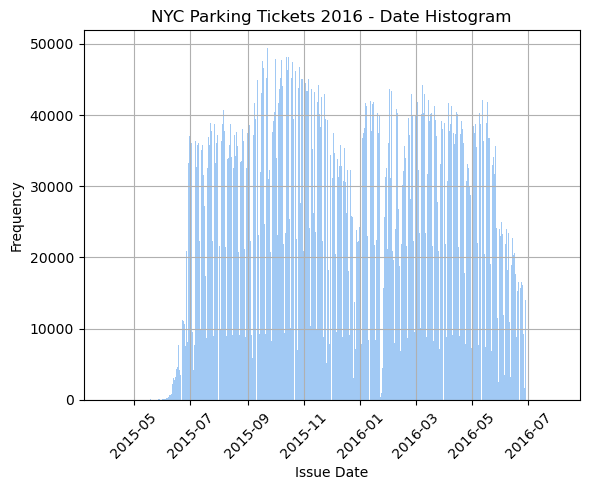

In [87]:
our_16.hist('issue_date', bins = 500, range = ('2015-04-01', '2016-08-01'))
plt.title('NYC Parking Tickets 2016 - Date Histogram')
plt.xlabel('Issue Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Here the left tail is shorter - about 1 month.

### our_17.issue_date

In [88]:
our_17.issue_date.describe()

count                         10803028
mean     2016-12-30 02:00:55.405800704
min                1972-03-30 00:00:00
25%                2016-09-30 00:00:00
50%                2017-01-03 00:00:00
75%                2017-04-03 00:00:00
max                2069-11-19 00:00:00
Name: issue_date, dtype: object

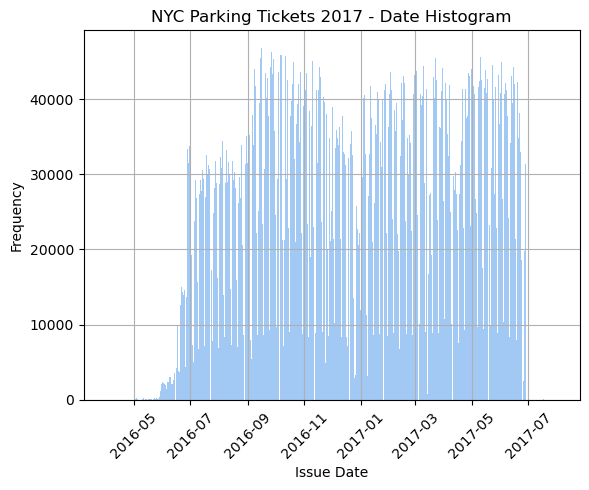

In [89]:
our_17.hist('issue_date', bins = 500, range = ('2016-04-01', '2017-08-01'))
plt.title('NYC Parking Tickets 2017 - Date Histogram')
plt.xlabel('Issue Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### Filtering dates

Every dataset has obvious errors - values like 1972, 2065 - they should be dropped. But what with left tails - values for about 2 months befor a fiscal year began that for some reason are recorded in current df and not in the previous df? 

**Should we:**
- cut them to make df for exactly 12 months  - but we may lose some portion of data
- take them, so dfs will have overlapping months? In future big df they will be added, duplicates(if any) can be removed?

My decision for now is to cut off values earlier than 2 months before July 1 (except for 2014 where even July is incomplete) and after July 1 of the next year.

In [90]:
f_our_14 = our_14[(our_14.issue_date >= '2013-07-01') & (our_14.issue_date < '2014-07-01')]
f_our_15 = our_15[(our_15.issue_date >= '2014-05-01') & (our_15.issue_date < '2015-07-01')]
f_our_16 = our_16[(our_16.issue_date >= '2015-05-01') & (our_16.issue_date < '2016-07-01')]
f_our_17 = our_17[(our_17.issue_date >= '2016-05-01') & (our_17.issue_date < '2017-07-01')]

In [91]:
f_our_14.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9087321 entries, 0 to 9100277
Data columns (total 13 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   plate_id               object        
 1   plate_type             category      
 2   registration_state     category      
 3   vehicle_body_type      category      
 4   violation_code         int64         
 5   violation_description  object        
 6   violation_precinct     int64         
 7   violation_county       category      
 8   violation_time         object        
 9   issue_date             datetime64[ns]
 10  house_number           object        
 11  street_name            object        
 12  law_section            float64       
dtypes: category(4), datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 736.7+ MB


In [63]:
f_our_15.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10907788 entries, 0 to 11809232
Data columns (total 13 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   plate_id               object        
 1   plate_type             category      
 2   registration_state     category      
 3   vehicle_body_type      category      
 4   violation_code         int64         
 5   violation_description  object        
 6   violation_precinct     int64         
 7   violation_county       category      
 8   violation_time         object        
 9   issue_date             datetime64[ns]
 10  house_number           object        
 11  street_name            object        
 12  law_section            float64       
dtypes: category(4), datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 884.3+ MB


In [92]:
# how many cases are there before 2015 fiscal year beginning - 'left tail'
tail_15=f_our_15[f_our_15.issue_date <'2014-07-01'].plate_id.count()
tail_15

309734

In [ ]:
f_our_16.info()

In [93]:
# left tail size
tail_16=f_our_16[f_our_16.issue_date <'2015-07-01'].plate_id.count()
tail_16

222493

In [ ]:
f_our_17.info()

In [94]:
#left tail size
tail_17=f_our_17[f_our_17.issue_date <'2016-07-01'].plate_id.count()
tail_17

256881

In [95]:
#all three tails summed
tails=tail_15+tail_16+tail_17
tails

789108

Now each df is 1-1.2+ GB, let's unite them in 1 table.

## All datasets in one

In [96]:
target = pd.concat([f_our_14,f_our_15,f_our_16,f_our_17], ignore_index=True)
target

,plate_id,plate_type,registration_state,vehicle_body_type,violation_code,violation_description,violation_precinct,violation_county,violation_time,issue_date,house_number,street_name,law_section
0,GBB9093,PAS,NY,SUBN,46,NaN,33.0,NaN,0752A,2013-08-04,712,W 175 ST,408.0
1,62416MB,COM,NY,VAN,46,NaN,33.0,NY,1240P,2013-08-04,201,W 177 ST,408.0
2,78755JZ,COM,NY,P-U,46,NaN,33.0,NY,1243P,2013-08-05,520,W 163 ST,408.0
3,63009MA,COM,NY,VAN,46,NaN,33.0,NY,0232P,2013-08-05,517,W 176 ST,408.0
4,91648MC,COM,NY,TRLR,41,NaN,33.0,NY,1239P,2013-08-08,590,W 174 ST,408.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41410973,HTA7759,PAS,PA,SDN,14,NaN,113.0,Q,0358A,2016-06-30,NaN,S/O TERMINAL 6 JFKIA,408.0
41410974,HFF8478,PAS,NY,SUBN,14,NaN,113.0,NaN,0615A,2016-06-30,NaN,TERMINAL 8 ARRIVALS,408.0
41410975,GZY9542,PAS,NY,SDN,70,NaN,42.0,BX,0623A,2016-06-30,3400,3RD AVE,408.0
41410976,HAB9889,PAS,NY,SUBN,16,NaN,43.0,BX,0645P,2016-06-30,1489,WEST AVE,408.0


In [97]:
len(f_our_14) + len(f_our_15) + len(f_our_16)  + len(f_our_17)

41410978

In [98]:
#count number of duplicates
t_dpl = target.duplicated().sum()
t_dpl

220939

Summed tails are greater than number of duplicates in target df, so we really saved some data - 568169 rows:

In [99]:
tails - t_dpl

568169

In [100]:
#dropping duplicates
target.drop_duplicates(inplace=True)

In [101]:
target.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41190039 entries, 0 to 41410977
Data columns (total 13 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   plate_id               object        
 1   plate_type             object        
 2   registration_state     object        
 3   vehicle_body_type      object        
 4   violation_code         int64         
 5   violation_description  object        
 6   violation_precinct     float64       
 7   violation_county       object        
 8   violation_time         object        
 9   issue_date             datetime64[ns]
 10  house_number           object        
 11  street_name            object        
 12  law_section            float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 4.3+ GB


After concatenating our category columns changed to object type. Let's make them category type again.

In [103]:
category_columns=['plate_type','registration_state','vehicle_body_type', 
                     'violation_county','violation_code']
target[category_columns] = target[category_columns].astype('category')


In [182]:
target.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41190039 entries, 0 to 41410977
Data columns (total 13 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   plate_id               object        
 1   plate_type             category      
 2   registration_state     category      
 3   vehicle_body_type      category      
 4   violation_code         category      
 5   violation_description  object        
 6   violation_precinct     float64       
 7   violation_county       category      
 8   violation_time         object        
 9   issue_date             datetime64[ns]
 10  house_number           object        
 11  street_name            object        
 12  law_section            float64       
dtypes: category(5), datetime64[ns](1), float64(2), object(5)
memory usage: 3.0+ GB


In [183]:
#check missing values
target.stb.missing(style=True)

,missing,total,percent
house_number,"6,873,654","41,190,039",16.69%
violation_description,"4,640,005","41,190,039",11.26%
violation_county,"4,023,428","41,190,039",9.77%
vehicle_body_type,"231,834","41,190,039",0.56%
street_name,"22,185","41,190,039",0.05%
plate_id,"8,723","41,190,039",0.02%
violation_time,"7,825","41,190,039",0.02%
law_section,3,"41,190,039",0.00%
violation_precinct,1,"41,190,039",0.00%
plate_type,0,"41,190,039",0.00%


Some missing values can be restored : vehicle_body_type from vehicle_make, violation_county from violation_precinct , violation_description from violation_code. 
Some missing values can't be restored: house number, violation time,  street name

Let's delete rows where plate_id, violation_time, street name,law_section, violation_precinct are missing - <1% of values.

In [184]:
columns_to_check = ['plate_id', 'violation_time', 'street_name','law_section', 'violation_precinct','vehicle_body_type' ]

# Drop rows where any value in the specified columns is missing
target_cl = target.dropna(subset=columns_to_check)

In [185]:
target_cl.stb.missing(style=True)

,missing,total,percent
house_number,"6,740,217","40,929,375",16.47%
violation_description,"4,496,711","40,929,375",10.99%
violation_county,"3,916,545","40,929,375",9.57%
plate_id,0,"40,929,375",0.00%
plate_type,0,"40,929,375",0.00%
registration_state,0,"40,929,375",0.00%
vehicle_body_type,0,"40,929,375",0.00%
violation_code,0,"40,929,375",0.00%
violation_precinct,0,"40,929,375",0.00%
violation_time,0,"40,929,375",0.00%


In [186]:
target_cl.head()

,plate_id,plate_type,registration_state,vehicle_body_type,violation_code,violation_description,violation_precinct,violation_county,violation_time,issue_date,house_number,street_name,law_section
0,GBB9093,PAS,NY,SUBN,46,NaN,33.0,NaN,0752A,2013-08-04,712,W 175 ST,408.0
1,62416MB,COM,NY,VAN,46,NaN,33.0,NY,1240P,2013-08-04,201,W 177 ST,408.0
2,78755JZ,COM,NY,P-U,46,NaN,33.0,NY,1243P,2013-08-05,520,W 163 ST,408.0
3,63009MA,COM,NY,VAN,46,NaN,33.0,NY,0232P,2013-08-05,517,W 176 ST,408.0
4,91648MC,COM,NY,TRLR,41,NaN,33.0,NY,1239P,2013-08-08,590,W 174 ST,408.0


## violation_county column
### Check and clean values

There are only 5 counties in NYC: New York County (Manhattan), Kings County (Brooklyn), Bronx County (The Bronx), Richmond County (Staten Island), and Queens County (Queens).But we see more values in violation_county

In [187]:
target_cl.violation_county.value_counts()

violation_county
NY       14235411
K         8523992
Q         7451217
BX        4436285
BK         961304
QN         734602
R          416357
ST         147788
MN         105813
KINGS          20
QUEEN           9
BRONX           6
QNS             6
RICH            4
MAN             3
RC              2
NEWY            2
NYC             2
NEW Y           2
KING            2
QU              1
103             1
MH              1
00000           0
Name: count, dtype: int64

In [188]:
county_mapping = {
    'NY': 'Manhattan',
    'K': 'Brooklyn',
    'Q': 'Queens',
    'BX': 'Bronx',
    'BK': 'Brooklyn',
    'QN': 'Queens',
    'R': 'Staten Island',
    'ST': 'Staten Island',
    'MN': 'Manhattan',
    'KINGS': 'Brooklyn',
    'QUEEN': 'Queens',
    'BRONX': 'Bronx',
    'QNS': 'Queens',
    'RICH': 'Staten Island',
    'MAN': 'Manhattan',
    'RC': 'Staten Island',
    'NEWY': 'Manhattan',
    'NYC': 'Manhattan',
    'NEW Y': 'Manhattan',
    'KING': 'Brooklyn',
    'QU': 'Queens',
    '103': None,  
    'MH': 'Manhattan',
    '00000': 'Undefined'
}

In [189]:
target_cl.loc[:, 'violation_county'] = target_cl['violation_county'].map(county_mapping).astype('category')
target_cl.head()

,plate_id,plate_type,registration_state,vehicle_body_type,violation_code,violation_description,violation_precinct,violation_county,violation_time,issue_date,house_number,street_name,law_section
0,GBB9093,PAS,NY,SUBN,46,NaN,33.0,NaN,0752A,2013-08-04,712,W 175 ST,408.0
1,62416MB,COM,NY,VAN,46,NaN,33.0,Manhattan,1240P,2013-08-04,201,W 177 ST,408.0
2,78755JZ,COM,NY,P-U,46,NaN,33.0,Manhattan,1243P,2013-08-05,520,W 163 ST,408.0
3,63009MA,COM,NY,VAN,46,NaN,33.0,Manhattan,0232P,2013-08-05,517,W 176 ST,408.0
4,91648MC,COM,NY,TRLR,41,NaN,33.0,Manhattan,1239P,2013-08-08,590,W 174 ST,408.0


In [190]:
target_cl.violation_county.value_counts()

violation_county
Manhattan        14341234
Brooklyn          9485318
Queens            8185835
Bronx             4436291
Staten Island      564151
Name: count, dtype: int64

### Address missing values

https://www.nytimes.com/2017/03/17/nyregion/nypd-precincts.html

'According to the New York Police Department’s public information office, the current breakdown has Manhattan with precincts that use numbers in the one-to-34 grouping; the Bronx, 40 to 52; Brooklyn, 60 to 94; Queens, 100 to 115; and Staten Island, 120 to 123.'

1-34 Manhattan
40-52 Bronx
60-94 Brooklyn
100-115 Queens
120-123 Staten Island
And not all precincts have numbers:
The 22nd Precinct is now the Central Park Precinct;
the 14th Precinct is now Midtown South;
and the 18th Precinct is now Midtown North.

If we know precinct we can find corresponding county and fill missing county values.

In [191]:
# Mapping dictionary for precinct to county
precinct_to_county_mapping = {
    range(1, 35): 'Manhattan',
    range(40, 53): 'Bronx',
    range(60, 95): 'Brooklyn',
    range(100, 116): 'Queens',
    range(120, 124): 'Staten Island',
}

# Custom function to map precinct to county and fill only missing values
def map_precinct_to_county(row):
    precinct = row['violation_precinct']
    county = row['violation_county']
    
    # Check if 'violation_county' is missing before filling
    if pd.isna(county):
        for precinct_range, county in precinct_to_county_mapping.items():
            if precinct in precinct_range:
                return county
    
    # Return the original 'violation_county' value if it's not missing
    return county


In [192]:
# Apply the custom function to fill missing violation_county values
target_cl['violation_county'] = target_cl.apply(map_precinct_to_county, axis=1)

# Display the updated dataframe
target_cl.head()

/var/folders/fw/h9yr354n7s7dgzvnd7wxs6w00000gp/T/ipykernel_68141/154757555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_cl['violation_county'] = target_cl.apply(map_precinct_to_county, axis=1)


,plate_id,plate_type,registration_state,vehicle_body_type,violation_code,violation_description,violation_precinct,violation_county,violation_time,issue_date,house_number,street_name,law_section
0,GBB9093,PAS,NY,SUBN,46,NaN,33.0,Manhattan,0752A,2013-08-04,712,W 175 ST,408.0
1,62416MB,COM,NY,VAN,46,NaN,33.0,Manhattan,1240P,2013-08-04,201,W 177 ST,408.0
2,78755JZ,COM,NY,P-U,46,NaN,33.0,Manhattan,1243P,2013-08-05,520,W 163 ST,408.0
3,63009MA,COM,NY,VAN,46,NaN,33.0,Manhattan,0232P,2013-08-05,517,W 176 ST,408.0
4,91648MC,COM,NY,TRLR,41,NaN,33.0,Manhattan,1239P,2013-08-08,590,W 174 ST,408.0


In [193]:
target_cl.violation_county.isna().sum() 

0

In [194]:
target_cl.violation_county.nunique()

5

Now violation_county column is ready.

## Address date and time values, change format

We have issue_date and violation_time columns, let's merge them and get data in the proper datetime format.
format for time conversion -- add 'M' to put into std 'AM' and 'PM' format
convert to Datetime format

In [195]:
tc=target_cl

We replace 00xx with 12xx as per python assumptions about AM/PM datetime format

In [196]:
tc['violation_time'] = tc['violation_time'].str.replace(r'^00', '12', regex=True) 

/var/folders/fw/h9yr354n7s7dgzvnd7wxs6w00000gp/T/ipykernel_68141/677209583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tc['violation_time'] = tc['violation_time'].str.replace(r'^00', '12', regex=True)


In [197]:
tc.loc[:, 'violation_time'] = tc['violation_time'] + 'M'

In [198]:
tc.head()

,plate_id,plate_type,registration_state,vehicle_body_type,violation_code,violation_description,violation_precinct,violation_county,violation_time,issue_date,house_number,street_name,law_section
0,GBB9093,PAS,NY,SUBN,46,NaN,33.0,Manhattan,0752AM,2013-08-04,712,W 175 ST,408.0
1,62416MB,COM,NY,VAN,46,NaN,33.0,Manhattan,1240PM,2013-08-04,201,W 177 ST,408.0
2,78755JZ,COM,NY,P-U,46,NaN,33.0,Manhattan,1243PM,2013-08-05,520,W 163 ST,408.0
3,63009MA,COM,NY,VAN,46,NaN,33.0,Manhattan,0232PM,2013-08-05,517,W 176 ST,408.0
4,91648MC,COM,NY,TRLR,41,NaN,33.0,Manhattan,1239PM,2013-08-08,590,W 174 ST,408.0


In [199]:
tc['issue_date'] = tc['issue_date'].astype(str)

/var/folders/fw/h9yr354n7s7dgzvnd7wxs6w00000gp/T/ipykernel_68141/2926940398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tc['issue_date'] = tc['issue_date'].astype(str)


In [200]:
tc['issue_datetime'] = tc['issue_date'] + ' ' + tc['violation_time'] 


/var/folders/fw/h9yr354n7s7dgzvnd7wxs6w00000gp/T/ipykernel_68141/1033744690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tc['issue_datetime'] = tc['issue_date'] + ' ' + tc['violation_time']


In [201]:
tc['issue_datetime'] = pd.to_datetime(tc['issue_datetime'], format='%Y-%m-%d %I%M%p', errors='coerce')
  

/var/folders/fw/h9yr354n7s7dgzvnd7wxs6w00000gp/T/ipykernel_68141/2396293857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tc['issue_datetime'] = pd.to_datetime(tc['issue_datetime'], format='%Y-%m-%d %I%M%p', errors='coerce')


In [202]:
tc.head()

,plate_id,plate_type,registration_state,vehicle_body_type,violation_code,violation_description,violation_precinct,violation_county,violation_time,issue_date,house_number,street_name,law_section,issue_datetime
0,GBB9093,PAS,NY,SUBN,46,NaN,33.0,Manhattan,0752AM,2013-08-04,712,W 175 ST,408.0,2013-08-04 07:52:00
1,62416MB,COM,NY,VAN,46,NaN,33.0,Manhattan,1240PM,2013-08-04,201,W 177 ST,408.0,2013-08-04 12:40:00
2,78755JZ,COM,NY,P-U,46,NaN,33.0,Manhattan,1243PM,2013-08-05,520,W 163 ST,408.0,2013-08-05 12:43:00
3,63009MA,COM,NY,VAN,46,NaN,33.0,Manhattan,0232PM,2013-08-05,517,W 176 ST,408.0,2013-08-05 14:32:00
4,91648MC,COM,NY,TRLR,41,NaN,33.0,Manhattan,1239PM,2013-08-08,590,W 174 ST,408.0,2013-08-08 12:39:00


In [203]:
tc.stb.missing()

,missing,total,percent
house_number,6740217,40929375,16.467921
violation_description,4496711,40929375,10.986513
issue_datetime,978,40929375,0.002389
plate_id,0,40929375,0.000000
plate_type,0,40929375,0.000000
registration_state,0,40929375,0.000000
vehicle_body_type,0,40929375,0.000000
violation_code,0,40929375,0.000000
violation_precinct,0,40929375,0.000000
violation_county,0,40929375,0.000000


In [204]:
tc['issue_datetime'].isna().sum()/len(tc)

2.3894818819002245e-05

We see missing values in issue_datetime column - they appeared after date and time concatenation probably due to errors/invalid data that could not be formatted.

In [205]:
tc[tc.issue_datetime.isna()]

,plate_id,plate_type,registration_state,vehicle_body_type,violation_code,violation_description,violation_precinct,violation_county,violation_time,issue_date,house_number,street_name,law_section,issue_datetime
5300,62627JM,COM,NY,DELV,19,NaN,84.0,Brooklyn,09+4AM,2013-07-19,21,SMITH ST,408.0,NaT
7227,T492873,PAS,IL,TRLR,19,NaN,40.0,Bronx,8445PM,2013-08-22,253B,E 149 ST,408.0,NaT
11928,GGB5886,PAS,NY,SDN,78,NaN,49.0,Bronx,8545PM,2013-07-25,NaN,WHITE PLAINS RD,408.0,NaT
23230,98400JX,COM,NY,VAN,51,NaN,1.0,Manhattan,3244PM,2013-07-02,NaN,E/S GREENWICH ST,408.0,NaT
24807,JR3316,PAS,IL,SUBN,40,NaN,73.0,Brooklyn,5402PM,2013-07-28,115,THATFORD AVE,408.0,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41362261,79508MH,COM,NY,DELV,78,NaN,113.0,Queens,3730PM,2016-06-29,NaN,165 STREET,408.0,NaT
41376266,GVA3792,PAS,NY,SUBN,40,NaN,49.0,Bronx,4859PM,2016-06-29,1858,HOLLAND,408.0,NaT
41376945,GCH5716,PAS,NY,SDN,21,NaN,78.0,Brooklyn,09+1AM,2016-06-29,317,4TH AV,408.0,NaT
41377089,GTH1750,PAS,99,SUBN,20,NaN,43.0,Bronx,3230PM,2016-06-29,NaN,CLASSON POINT LANE,408.0,NaT


Let's drop missing values, is too small portion of data - 978 rows or 2.282001602805216e-03%

In [206]:
tc = tc.dropna(subset='issue_datetime')

Now 'issue_datetime' column is ready, we can drop 'issue_date', 'violation_time' columns

In [207]:
t = tc.drop(columns = ['issue_date', 'violation_time'])
t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40928397 entries, 0 to 41410977
Data columns (total 12 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   plate_id               object        
 1   plate_type             category      
 2   registration_state     category      
 3   vehicle_body_type      category      
 4   violation_code         category      
 5   violation_description  object        
 6   violation_precinct     float64       
 7   violation_county       object        
 8   house_number           object        
 9   street_name            object        
 10  law_section            float64       
 11  issue_datetime         datetime64[ns]
dtypes: category(4), datetime64[ns](1), float64(2), object(5)
memory usage: 2.9+ GB


## Address violation_description missing values

In [208]:
t.violation_description.unique()

array([nan, 'BUS LANE VIOLATION', 'FAILURE TO STOP AT RED LIGHT',
       '21-No Parking (street clean)', '13-No Stand (taxi stand)',
       '20A-No Parking (Non-COM)', '37-Expired Muni Meter',
       '40-Fire Hydrant', '71-Insp. Sticker Missing (NYS',
       '74-Missing Display Plate', '38-Failure to Display Muni Rec',
       '14-No Standing', '71A-Insp Sticker Expired (NYS)',
       '84-Platform lifts in low posit', '50-Crosswalk',
       '68-Not Pkg. Comp. w Psted Sign', '42-Exp. Muni-Mtr (Com. Mtr. Z)',
       '69-Failure to Disp Muni Recpt', '31-No Stand (Com. Mtr. Zone)',
       '70A-Reg. Sticker Expired (NYS)', '19-No Stand (bus stop)',
       '48-Bike Lane', '17-No Stand (exc auth veh)',
       '82-Unaltered Commerc Vehicle', '46A-Double Parking (Non-COM)',
       '75-No Match-Plate/Reg. Sticker', '98-Obstructing Driveway',
       '51-Sidewalk', '61-Wrong Way', '53-Safety Zone',
       '43-Exp. Mtr. (Com. Mtr. Zone)', '71B-Improp Safety Stkr (NYS)',
       '62-Beyond Marked Spac

In [209]:
t.violation_code.unique()

[46, 41, 14, 24, 20, ..., 36, 3, 2, 87, 33]
Length: 100
Categories (100, int64): [0, 1, 2, 3, ..., 96, 97, 98, 99]

In [210]:
# make a dictionary of codes and code descriptions
code_description_dict = {}

# Iterate through unique violation codes
for code in t['violation_code'].unique():
    # Extract non-null descriptions for the current code
    non_null_descriptions = t[t['violation_code'] == code]['violation_description'].dropna()
    
    # Create a dictionary for the current code with description counts
    description_counts = non_null_descriptions.value_counts().to_dict()
    
    # Add to the dictionary
    code_description_dict[code] = description_counts

code_description_dict

{46: {'46A-Double Parking (Non-COM)': 647143,
  '46B-Double Parking (Com-100Ft)': 571306,
  '46-Double Parking (Com Plate)': 27667},
 41: {},
 14: {'14-No Standing': 3178525},
 24: {'24-No Parking (exc auth veh)': 160707},
 20: {'20A-No Parking (Non-COM)': 1841993,
  '20-No Parking (Com Plate)': 239796},
 17: {'17-No Stand (exc auth veh)': 304211},
 50: {'50-Crosswalk': 282595},
 40: {'40-Fire Hydrant': 1540148},
 51: {'51-Sidewalk': 213409},
 31: {'31-No Stand (Com. Mtr. Zone)': 605602},
 85: {'85-Storage-3 hour Commercial': 90147},
 19: {'19-No Stand (bus stop)': 892392},
 18: {'18-No Stand (bus lane)': 55077},
 74: {'74-Missing Display Plate': 199903,
  '74A-Improperly Displayed Plate': 69045,
  '74B-Covered Plate': 53836},
 98: {'98-Obstructing Driveway': 18911},
 21: {'21-No Parking (street clean)': 4839564},
 16: {'16A-No Std (Com Veh) Non-COM': 399420,
  '16-No Std (Com Veh) Com Plate': 386252},
 38: {'38-Failure to Display Muni Rec': 4719840,
  'stdev_submitted_chrg_amt":"0': 1

In [211]:
# Iterate through sorted keys
for code in sorted(code_description_dict.keys()):
    # Print code and associated dictionary on a separate line
    print(f"{code}: {code_description_dict[code]}")

0: {20.0: 1}
1: {'01-No Intercity Pmt Displ': 5065}
2: {'02-No operator N/A/PH': 95}
3: {'03-Unauth passenger pick-up': 4080}
4: {'04A-Downtown Bus Area, Non-Bus': 2918, '04B-Downtown Bus Area, No Prmt': 272, '04-Downtown Bus Area, 3 Hr Lim': 76}
5: {'BUS LANE VIOLATION': 537874}
6: {'06-Nighttime PKG (Trailer)': 32}
7: {'FAILURE TO STOP AT RED LIGHT': 1986985}
8: {'08-Engine Idling': 11398}
9: {'09-Blocking the Box': 69991}
10: {'10-No Stopping': 142544}
11: {'11-No Stand (exc hotel load)': 17317}
12: {'12-No Stand (snow emergency)': 39}
13: {'13-No Stand (taxi stand)': 107050}
14: {'14-No Standing': 3178525}
15: {}
16: {'16A-No Std (Com Veh) Non-COM': 399420, '16-No Std (Com Veh) Com Plate': 386252}
17: {'17-No Stand (exc auth veh)': 304211}
18: {'18-No Stand (bus lane)': 55077}
19: {'19-No Stand (bus stop)': 892392}
20: {'20A-No Parking (Non-COM)': 1841993, '20-No Parking (Com Plate)': 239796}
21: {'21-No Parking (street clean)': 4839564}
22: {'22-No Parking (exc hotel load)': 240}


In [212]:
tc.violation_description.isna().sum()

4495733

In [213]:
code_description_df = pd.DataFrame([(code, desc) for code, descs in code_description_dict.items() for desc in descs], columns=['violation_code', 'violation_description'])

# Find the most common description for each code
most_common_descriptions = code_description_df.groupby('violation_code')['violation_description'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Map the codes to their most common description and fill missing values
t['violation_description'] = t['violation_code'].map(most_common_descriptions).fillna(t['violation_description'])

# Verify the changes
print(t['violation_description'].isnull().sum())  # Check if there are any missing values remaining

39966


In [214]:
t['violation_description'].isnull().sum()/len(t)

0.0009764858369605827

We filled the majority of 4495733 missing rescriptions, only 0.1% remain. Let's drop them.

In [215]:
t = t.dropna(subset='violation_description')

In [216]:
t.stb.missing()

,missing,total,percent
house_number,6734398,40888431,16.47018
plate_id,0,40888431,0.00000
plate_type,0,40888431,0.00000
registration_state,0,40888431,0.00000
vehicle_body_type,0,40888431,0.00000
violation_code,0,40888431,0.00000
violation_description,0,40888431,0.00000
violation_precinct,0,40888431,0.00000
violation_county,0,40888431,0.00000
street_name,0,40888431,0.00000


## Filter descriptions

Let's drop rows for codes not related to parking/stopping:
0: {20.0: 1}
1: {'01-No Intercity Pmt Displ': 5057}
2: {'02-No operator N/A/PH': 93}
3: {'03-Unauth passenger pick-up': 4040}
5: {'BUS LANE VIOLATION': 537947}
7: {'FAILURE TO STOP AT RED LIGHT': 1987049}
8: {'08-Engine Idling': 11385}
9: {'09-Blocking the Box': 69900}
36: {'PHTO SCHOOL ZN SPEED VIOLATION': 3480236}
57: {'57-Blue Zone': 8} - Overweight vehicle detected by the weigh-in-motion (WIM) violation monitoring system 
74: {'74-Missing Display Plate': 199851, '74A-Improperly Displayed Plate': 69030, '74B-Covered Plate': 53813}




In [217]:
codes_to_drop = [0, 1, 2, 3, 5, 7, 8, 9, 36, 57, 74]

# Filter rows where 'violation_code' is not in the list
final = t[~t['violation_code'].isin(codes_to_drop)]

In [218]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34376804 entries, 0 to 41410977
Data columns (total 12 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   plate_id               object        
 1   plate_type             category      
 2   registration_state     category      
 3   vehicle_body_type      category      
 4   violation_code         category      
 5   violation_description  object        
 6   violation_precinct     float64       
 7   violation_county       object        
 8   house_number           object        
 9   street_name            object        
 10  law_section            float64       
 11  issue_datetime         datetime64[ns]
dtypes: category(4), datetime64[ns](1), float64(2), object(5)
memory usage: 2.5+ GB


In [219]:
final.law_section.value_counts()

law_section
408.0     34376797
6408.0           2
3040.0           2
2040.0           1
1040.0           1
40.0             1
Name: count, dtype: int64

408     8740374
1180    1400614
1111     662030
0             4
6408          2
3040          2
1040          1
40            1

https://codelibrary.amlegal.com/codes/newyorkcity/latest/NYCrules/0-0-0-63770
 4-08 Parking, Stopping, Standing.
   (a)   General provisions. 
      (1)   Compliance with rules. No person shall stop, stand or park a vehicle, whether attended or unattended, other than in accordance with authorized signs, pavement markings, or other traffic control devices, unless necessary to avoid conflict with other traffic or in compliance with law or direction of any law enforcement officer or other person authorized to enforce these rules.
         (i)   Sign placement. For purposes of this 34 RCNY § 4-08, one authorized regulatory sign anywhere on a block, which is the area of sidewalk between one intersection and the next, shall be sufficient notice of the restriction(s) in effect on that block.
         (ii)   Pedicabs. No person shall park, stand, or stop a pedicab where a person is prohibited from parking, standing or stopping a vehicle in accordance with these rules.
      (2)   Stopping prohibited. When stopping is prohibited by signs or rules, no person shall stop, stand or park a vehicle, whether attended or unattended.
      (3)   Standing prohibited. When standing is prohibited by signs or rules, no person shall stop a vehicle, attended or unattended, except temporarily for the purpose of and while actually engaged in expeditiously receiving or discharging passengers.
         (i)   Dedicated use signs. Standing is prohibited when a dedicated use is specified by a sign, including but not limited to the following curb regulations: Commercial Vehicles Only, Truck Loading Only, Taxi Stand, Taxi Relief Stand, Authorized Vehicles Only, NYP License Plates Only, Doctor License Plates Only, For-Hire Vehicles Only, Ambulance Only, Ambulette Only, Medical Facility Only, Bus Layover Only, NYS Road Test Only, Flea Market Loading Only, Farmers Market Only, Waiting Line, Carshare Parking Only, Electric Vehicle Charging Only, Loading Only, or Parking Permitted.
      (4)   Parking prohibited. When parking is prohibited by signs or rules, no person shall stop a vehicle, attended or unattended, except temporarily for the purpose of and while expeditiously receiving or discharging passengers or loading of unloading property to or from the curb.
      (5)   Vehicles prohibited on berms and shoulders. Stopping, parking or operating a motor vehicle is prohibited on the berm or shoulder adjacent to a parkway or a highway as specified in 34 RCNY § 4-07(i), except for emergency purposes.
      (6)   Paper or other temporary signs. Any paper or other temporary signs posted by authorized agencies shall supersede all existing posted rules for the days and times specified.
      (7)   Holiday suspensions of parking rules.
 

In [220]:
final[final.law_section==408].violation_description.value_counts()

violation_description
21-No Parking (street clean)      5735144
38-Failure to Display Muni Rec    4751785
14-No Standing                    3514257
37-Expired Muni Meter             2756862
20-No Parking (Com Plate)         2369717
                                   ...   
29-Altered Intercity bus pmt          138
93-Repair Flat Tire (Maj Road)        124
44-Exc Limit (Com. Mtr. Zone)         105
33-Feeding Meter                      102
28-O/T STD,DPL/Con,30 Mn,D Dec         50
Name: count, Length: 80, dtype: int64

In [221]:
final[final.law_section!=408].violation_description.value_counts()

violation_description
78-Nighttime PKG on Res Street    2
46-Double Parking (Com Plate)     2
21-No Parking (street clean)      1
40-Fire Hydrant                   1
20A-No Parking (Non-COM)          1
Name: count, dtype: int64

In [223]:
#drop unnecessary columns
ff= final.drop(['law_section', 'violation_code'], axis=1)
ff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34376804 entries, 0 to 41410977
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   plate_id               object        
 1   plate_type             category      
 2   registration_state     category      
 3   vehicle_body_type      category      
 4   violation_description  object        
 5   violation_precinct     float64       
 6   violation_county       object        
 7   house_number           object        
 8   street_name            object        
 9   issue_datetime         datetime64[ns]
dtypes: category(3), datetime64[ns](1), float64(1), object(5)
memory usage: 2.2+ GB


## Valid precincts

In [224]:
county_precinct_dict = {
    'Manhattan': list(range(1,35)),
    'Bronx': list(range(40,53)),
    'Brooklyn': list(range(60,95)),
    'Queens': list(range(100,116)),
    'Staten Island': list(range(120,124))
}

In [225]:
ff.violation_county.nunique()

5

In [226]:
ff.groupby('violation_county').violation_precinct.unique()

violation_county
Bronx            [44.0, 45.0, 43.0, 41.0, 0.0, 42.0, 50.0, 40.0...
Brooklyn         [88.0, 79.0, 76.0, 78.0, 71.0, 81.0, 28.0, 90....
Manhattan        [33.0, 13.0, 1.0, 5.0, 28.0, 26.0, 14.0, 46.0,...
Queens           [107.0, 112.0, 109.0, 115.0, 101.0, 103.0, 100...
Staten Island    [120.0, 122.0, 102.0, 123.0, 0.0, 13.0, 121.0,...
Name: violation_precinct, dtype: object

In [227]:
counties = list(ff['violation_county'].unique())
for county in counties:
    print('The number of precints in {} data are: {}'.format(county, 
                    
                                              ff['violation_precinct'][ff['violation_county'] == county].nunique()))


The number of precints in Manhattan data are: 372
The number of precints in Brooklyn data are: 371
The number of precints in Queens data are: 247
The number of precints in Staten Island data are: 231
The number of precints in Bronx data are: 238


In [228]:
ff[ff.violation_county == 'Manhattan'].violation_precinct.value_counts()

violation_precinct
19.0     2116546
18.0     1459726
14.0     1381684
1.0      1188270
13.0     1049464
          ...   
216.0          1
250.0          1
744.0          1
660.0          1
116.0          1
Name: count, Length: 372, dtype: int64

Lots of unvalid precincts that have to be cleaned.

In [229]:
# Custom function to clean 'violation_precinct'
def clean_precinct(row):
    county = row['violation_county']
    precinct = row['violation_precinct']

    # Check if precinct is valid for the county
    if county in county_precinct_dict and precinct in county_precinct_dict[county]:
        return precinct
    else:
        return np.nan

# Apply the custom function to clean 'violation_precinct'
ff['violation_precinct'] = ff.apply(clean_precinct, axis=1)
ff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34376804 entries, 0 to 41410977
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   plate_id               object        
 1   plate_type             category      
 2   registration_state     category      
 3   vehicle_body_type      category      
 4   violation_description  object        
 5   violation_precinct     float64       
 6   violation_county       object        
 7   house_number           object        
 8   street_name            object        
 9   issue_datetime         datetime64[ns]
dtypes: category(3), datetime64[ns](1), float64(1), object(5)
memory usage: 2.2+ GB


In [230]:
ff.violation_precinct.isna().sum()

75836

In [231]:
ff.violation_precinct.isna().sum()/len(ff)

0.0022060224097621177

In [232]:
counties = list(ff['violation_county'].unique())
for county in counties:
    print('The number of precints in {} data are: {}'.format(county, 
                    
                                              ff['violation_precinct'][ff['violation_county'] == county].nunique()))


The number of precints in Manhattan data are: 34
The number of precints in Brooklyn data are: 35
The number of precints in Queens data are: 16
The number of precints in Staten Island data are: 4
The number of precints in Bronx data are: 13


In [233]:
ff.dropna(subset=['violation_precinct'], inplace=True)
ff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34300968 entries, 0 to 41410977
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   plate_id               object        
 1   plate_type             category      
 2   registration_state     category      
 3   vehicle_body_type      category      
 4   violation_description  object        
 5   violation_precinct     float64       
 6   violation_county       object        
 7   house_number           object        
 8   street_name            object        
 9   issue_datetime         datetime64[ns]
dtypes: category(3), datetime64[ns](1), float64(1), object(5)
memory usage: 2.2+ GB


### to csv

In [235]:
#change format to mimimize size
ff['summons_number'] = ff['summons_number'].astype('int32')
ff['violation_precinct'] = ff['violation_precinct'].astype('int32')
ff['violation_county'] = ff['violation_county'].astype('category')

ff.info()


<class 'pandas.core.frame.DataFrame'>
Index: 34300968 entries, 0 to 41410977
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   plate_id               object        
 1   plate_type             category      
 2   registration_state     category      
 3   vehicle_body_type      category      
 4   violation_description  object        
 5   violation_precinct     int32         
 6   violation_county       category      
 7   house_number           object        
 8   street_name            object        
 9   issue_datetime         datetime64[ns]
dtypes: category(4), datetime64[ns](1), int32(1), object(4)
memory usage: 1.8+ GB


Now we have data for all 4 years in one df of 10 columns, missing values only in house_number. I cleaned violation_county(now 5 unique NYC counties/boroughs), violation_precinct(only valid precincts) issue_datetime instead of issue date violation, violation_description(only belonging to Parking, Stopping, Standing violations).  I didn't clean street_name,vehicle_body_type, plate_type. Now ff is 1.8GB

In [237]:
fff=ff

,plate_id,plate_type,registration_state,vehicle_body_type,violation_description,violation_precinct,violation_county,house_number,street_name,issue_datetime
0,GBB9093,PAS,NY,SUBN,46-Double Parking (Com Plate),33,Manhattan,712,W 175 ST,2013-08-04 07:52:00
1,62416MB,COM,NY,VAN,46-Double Parking (Com Plate),33,Manhattan,201,W 177 ST,2013-08-04 12:40:00
2,78755JZ,COM,NY,P-U,46-Double Parking (Com Plate),33,Manhattan,520,W 163 ST,2013-08-05 12:43:00
3,63009MA,COM,NY,VAN,46-Double Parking (Com Plate),33,Manhattan,517,W 176 ST,2013-08-05 14:32:00
5,T60DAR,PAS,NJ,P-U,14-No Standing,33,Manhattan,525,W 175 ST,2013-08-11 18:17:00
...,...,...,...,...,...,...,...,...,...,...
41410973,HTA7759,PAS,PA,SDN,14-No Standing,113,Queens,NaN,S/O TERMINAL 6 JFKIA,2016-06-30 03:58:00
41410974,HFF8478,PAS,NY,SUBN,14-No Standing,113,Queens,NaN,TERMINAL 8 ARRIVALS,2016-06-30 06:15:00
41410975,GZY9542,PAS,NY,SDN,70-Reg. Sticker Missing (NYS),42,Bronx,3400,3RD AVE,2016-06-30 06:23:00
41410976,HAB9889,PAS,NY,SUBN,16-No Std (Com Veh) Com Plate,43,Bronx,1489,WEST AVE,2016-06-30 18:45:00


In [152]:
file_path = '/Users/Nina/Downloads/fff.csv'
fff.to_csv(file_path, index=False)